## ADVANCED VISUALIZATION 

## Exploring Datasets with pandas and Matplotlib
Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization.

Datasets:

Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous/next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian immigration data

## Downloading and Prepping Data

Import Primary Modules: 

In [43]:
import numpy as np
import pandas as pd
from PIL import Image

In [4]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [5]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_Sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
print(df_can.shape)

(195, 43)


In [8]:
# Membersihkan dataset dengan menghilangkan kolom tidak penting
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Mengubah nama kolom sehingga lebih masuk akal
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)

# Guna konsistensi, membuat semua label kolom bertipe string
df_can.columns = list(map(str, df_can.columns))

# Set nama country sebagai index - berguna dalam mencari negara secara cepat dengan method .loc
df_can.set_index('Country', inplace = True)

# Menambahkan kolom 'Total'
df_can['Total'] = df_can.sum(axis = 1)

# Tahun yang akan kita gunakan pada sesi ini - berguna dalam plotting nanti
years = list(map(str, range(1980, 2014)))
print('Data dimensions: ', df_can.shape)

Data dimensions:  (195, 38)


C:\Users\eliza\AppData\Local\Temp\ipykernel_11756\2340490264.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.1


## Waffle Charts (Optional)
Waffle chart adalah visualisasi menarik yang biasa digunakan untuk menampilkan progress menuju suatu tujuan. Waffle chart biasanya dijadikan opsi yang efektif saat menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel seperti dasbor Excel. 

Kasus penggunaan yang bagus 
* membandingkan item tingkat tinggi atau melihat bagaimana mereka berkontribusi secara keseluruhan 
* menempatkan peningkatan penekanan pada bagian dari keseluruhan 
* menggunakan grafik KPI (Key Performance Indicator) sebagai % total 

In [10]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [20]:
total_values = sum(df_dsn['Total'])
total_values

12094

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

enumerate (itterable, start)
* iterable : an iterable object 
* start : a number. defining the start number 

## Step 2: Menentukan ukuran keseluruhan dari Waffle Chart

In [12]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


## Step 3: Menggunakan Proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [13]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


## Step 4: Membuat matriks yang menyerupai wafel dan mengisinya 

In [22]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

#populate the waffle chart 
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of titles populated of the current category is equal to 
        if (tile_index > sum(tiles_per_category[0:category_index])):
            category_index += 1
            
        # set the class value to an integer, which increases with class     
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [15]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

C:\Users\eliza\AppData\Local\Temp\ipykernel_11756\2255068170.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

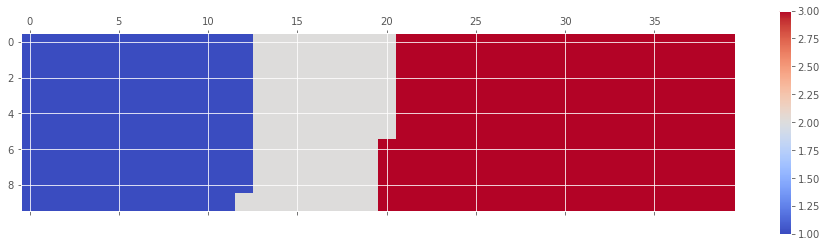

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

## Step 5: Petakan matriks waffle chart menjadi Visual 

C:\Users\eliza\AppData\Local\Temp\ipykernel_11756\2697294727.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


([], [])

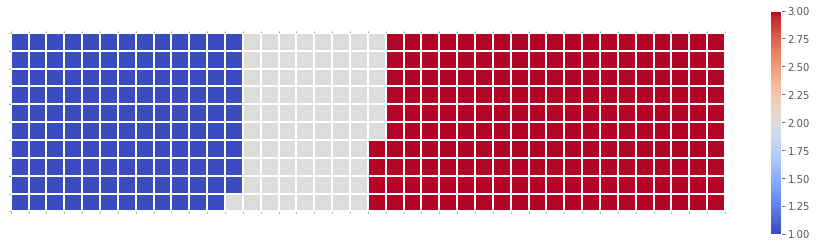

In [24]:
# instantiate a new figure object fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

## Step 5: Percantik Chart 

C:\Users\eliza\AppData\Local\Temp\ipykernel_11756\539701645.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

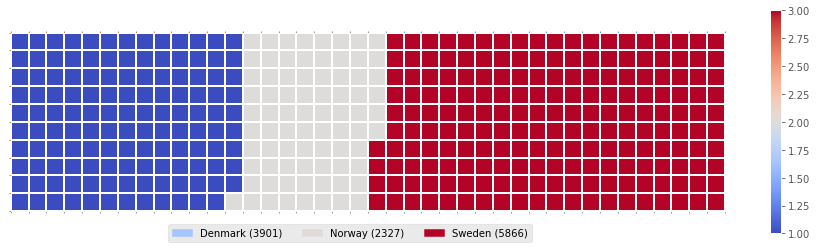

In [28]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )    

Agar lebih efisien, mari kita gabungkan tujuh langkah ke dalam satu fungsi yang disebut _create_wafflechart. Fungsi ini akan mengambil parameter berikut:

* categories: Unique categories or classes in dataframe
* values: Values corresponding to categories or classes.
* height: Defined height of waffle chart.
* width: Defined width of waffle chart.
* colormap: Colormap class
* value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.


In [29]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\eliza\AppData\Local\Temp\ipykernel_11756\3680642677.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

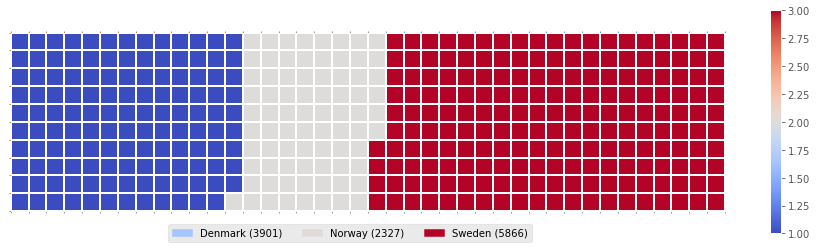

In [33]:
width = 40 # width of chart 
height = 10 # heigth of chart 

categories = df_dsn.index.values
values = df_dsn['Total'] 

colormap = plt.cm.coolwarm

create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds
Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.



In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Install wordcloud
!conda install -c conda-forge wordcloud --yes

# Import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29

In [46]:
alice_novel = open('alice_novel.txt', 'r').read()

print('File downlaoded and saved!')

File downlaoded and saved!


In [47]:
alice_novel

'ï»¿Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what

In [37]:
# Menggunakan stopwords dari word_cloud

stopwords = set(STOPWORDS)

In [49]:
# Instantiate a word cloud object

alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# Generate the word cloud
alice_wc.generate(alice_novel)

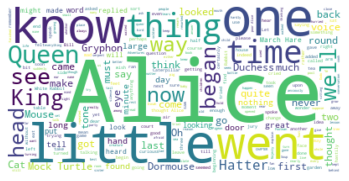

In [50]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

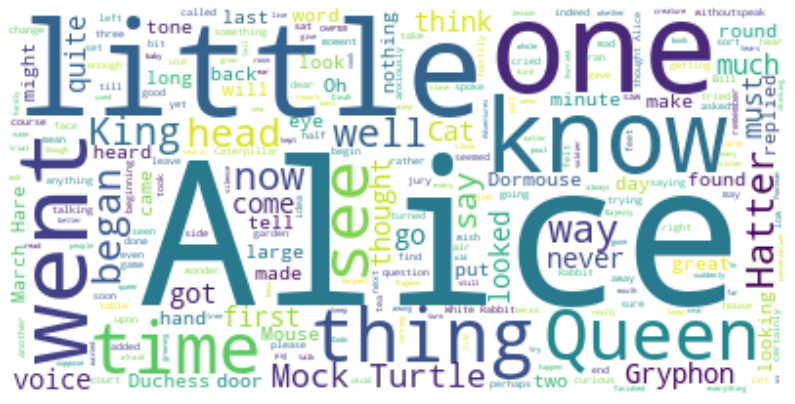

In [51]:
stopwords.add('said') # Add the words said to stopwords

# Re-generate the word cloud
alice_wc.generate(alice_novel)

# Display the cloud
fig = plt.figure()
fig.set_figwidth(14) # Set width
fig.set_figheight(18) # Set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
# Melapiskan word_cloud ke dalam mask

alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


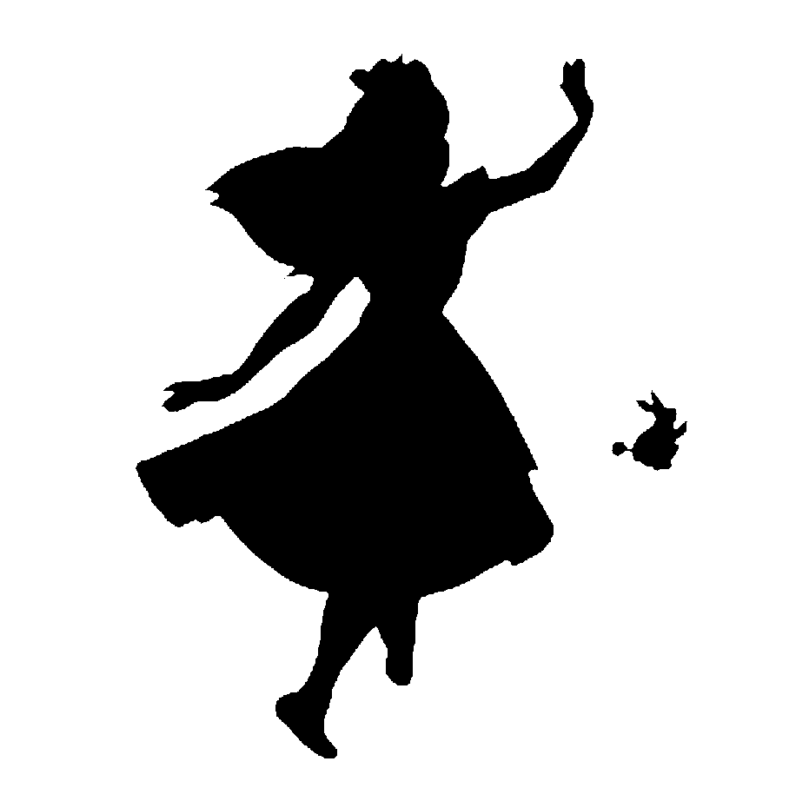

In [61]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

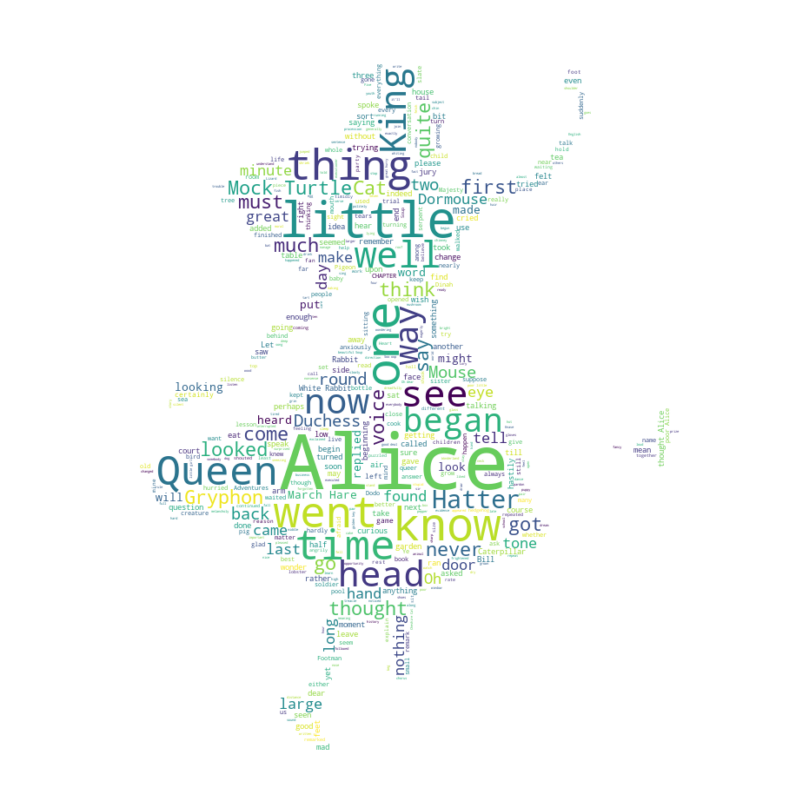

In [62]:
# Instnatiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# Generate the word cloud
alice_wc.generate(alice_novel)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # Set width
fig.set_figheight(18) # Set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sayangnya data keimigrasian kita tidak memiliki data teks apapun, tapi di mana ada kemauan pasti ada jalan. Mari buat contoh data teks dari dataset imigrasi kita! Katakanlah data teks 90 kata.

In [63]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [64]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [65]:
# Menggunakan countries dengan nama satu kata
# Menduplikasi nama tiap negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi

max_words = 90
word_string = ''

for country in df_can.index.values:
    # Check if country's name is a single-word name
    if (len(country.split(' ')) == 1):
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration) * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
    
# Display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [66]:
# Create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


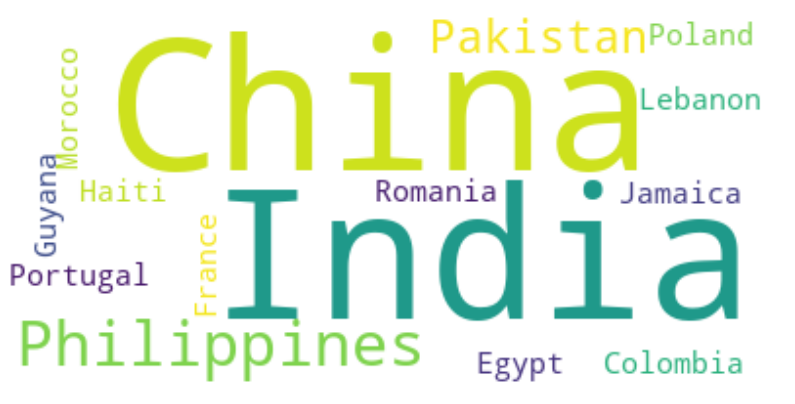

In [67]:
# Display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots
Seaborn is a Python visualization library based on matplotlib. It provides a high-leve interface for drawing attractive statistical graphics.

Di section ini, kita akan menjelajahi seaborn dan melihat seberapa efisiennya membuat garis regresi dan menyesuaikannya menggunakan pustaka ini!

In [68]:
# Install seaborn
!pip install seaborn

# Import library
import seaborn as sns

print('Seaborn installed and imported')

Seaborn installed and imported


In [69]:
# Membuat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013

# We can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# Reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# Rename columns
df_tot.columns = ['year', 'total']

# View the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


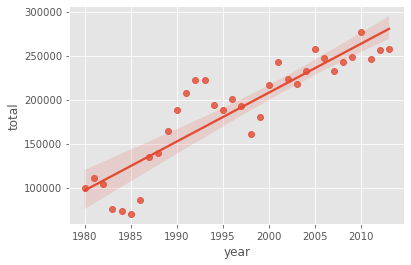

In [70]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

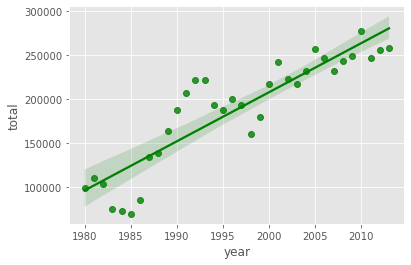

In [71]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

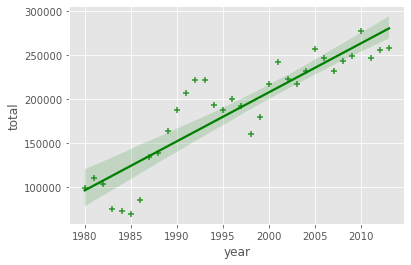

In [72]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

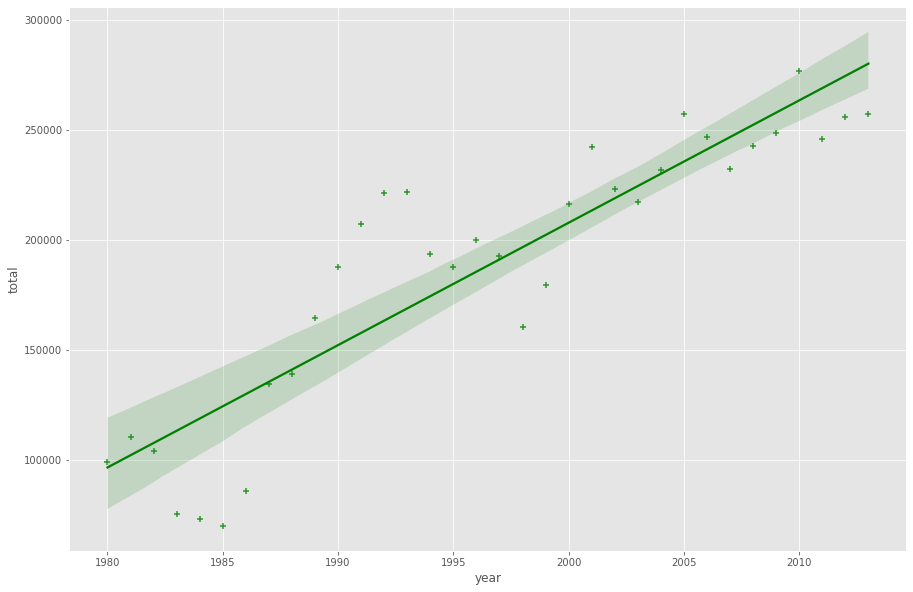

In [73]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

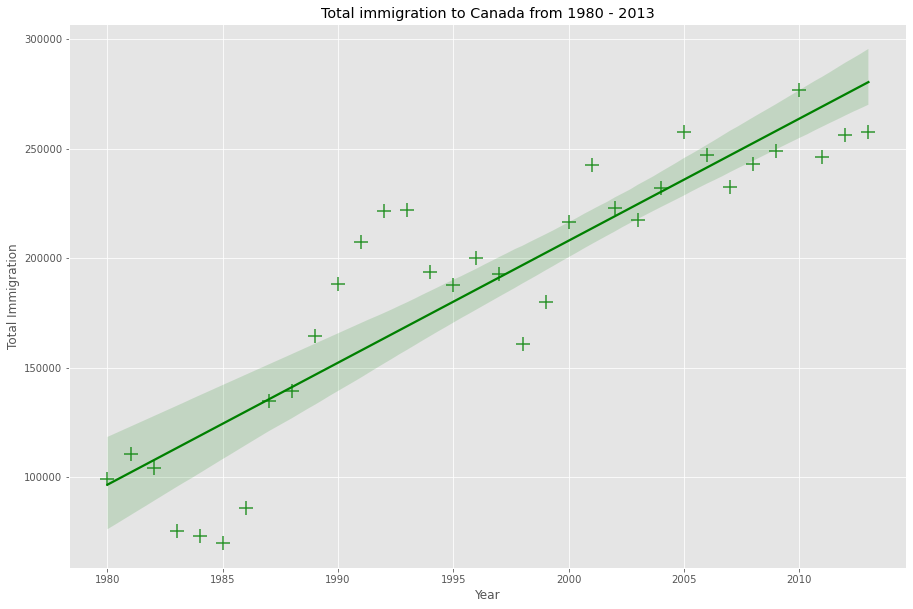

In [74]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

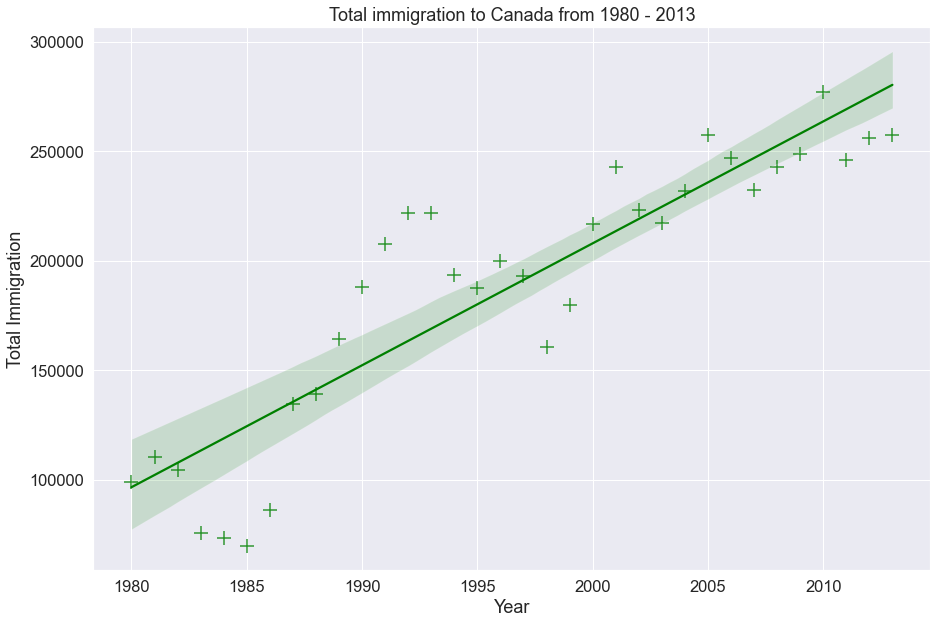

In [75]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

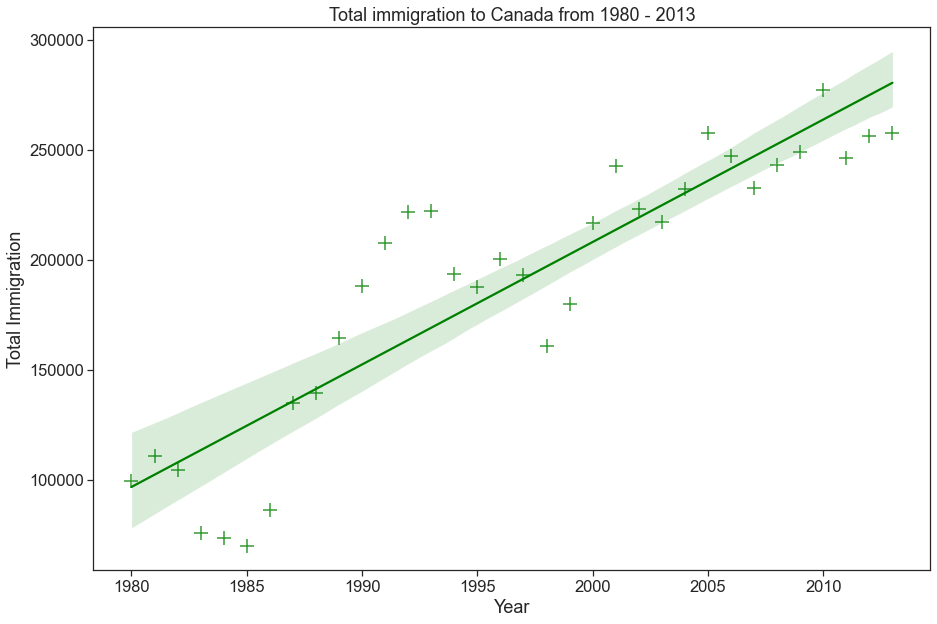

In [76]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

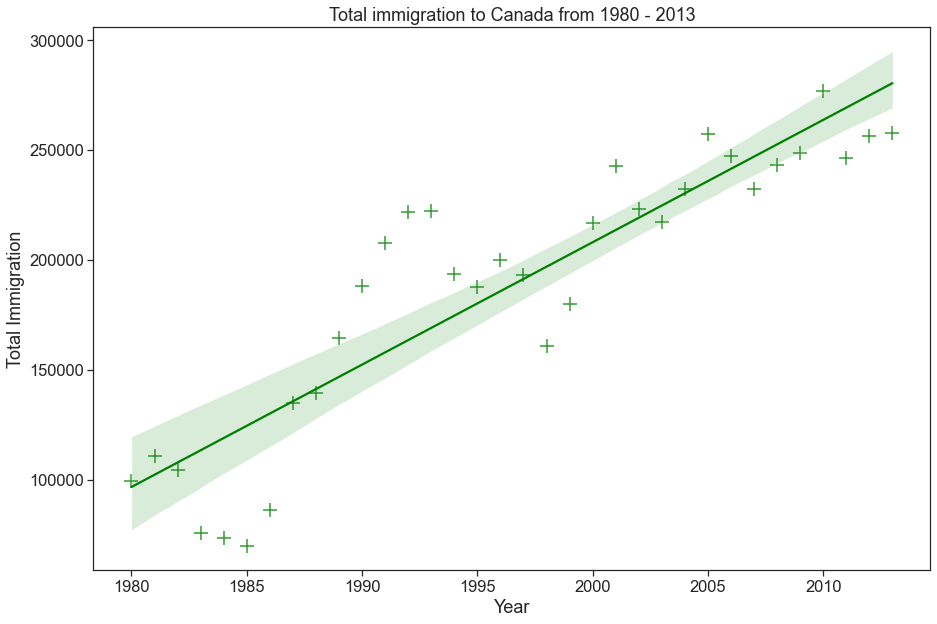

In [77]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

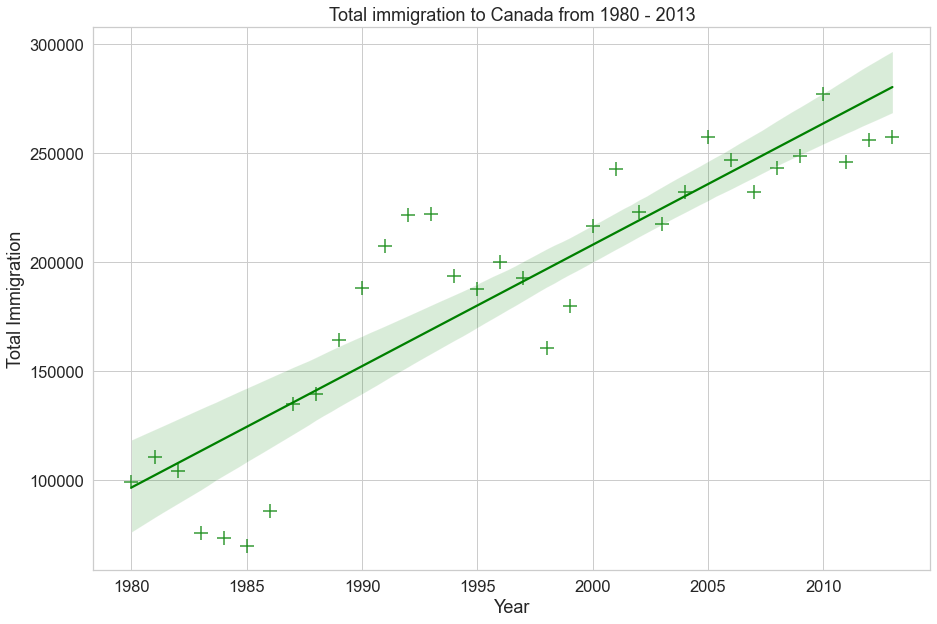

In [78]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

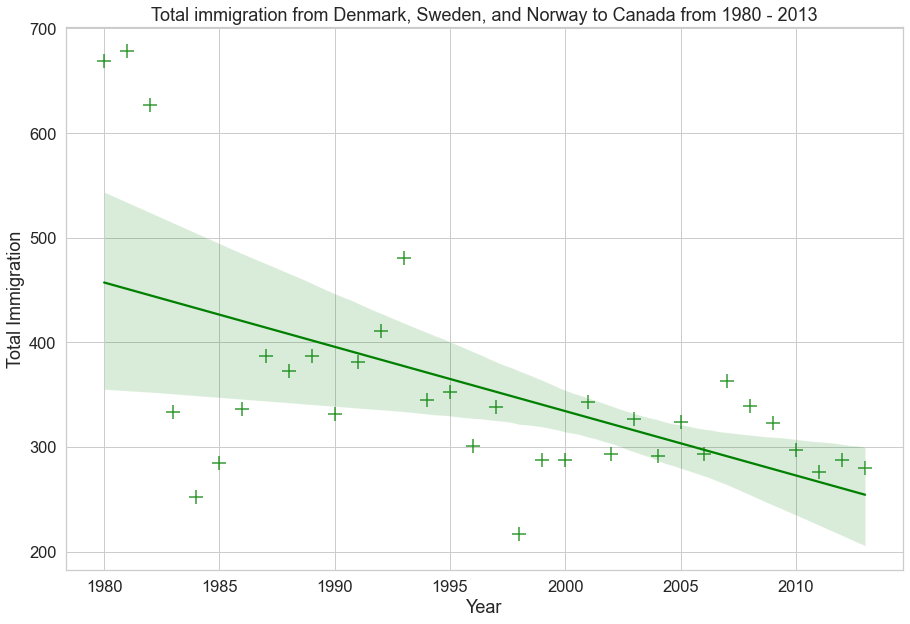

In [79]:
# Create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# Create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Reset index in place
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['year', 'total']

# Change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# Define figure size
plt.figure(figsize=(15, 10))

# Define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

## Sesi 8.2 - Advanced Visualization 2

Di section ini, kita akan mempelajari cara membuat peta untuk berbagai tujuan. Untuk melakukannya, kita akan berpisah dengan Matplotlib dan bekerja dengan pustaka visualisasi Python lain, yaitu Folium. Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium, di sisi lain, sepenuhnya gratis.

## Exploring Datasets with pandas and Matplotlib
Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. Perpustakaan plotting utama yang akan kita jelajahi di section ini adalah Folium.

Datasets:

Insiden Departemen Kepolisian San Francisco untuk tahun 2016 - Insiden Departemen Kepolisian dari portal data publik San Francisco. Insiden berasal dari sistem Pelaporan Insiden Kejahatan Departemen Kepolisian San Francisco (SFPD). Diperbarui setiap hari, menampilkan data sepanjang tahun 2016. Alamat dan lokasi telah dianonimkan dengan pindah ke blok tengah atau ke persimpangan.

Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

## Downloading and Prepping Data

In [80]:
import numpy as np
import pandas as pd 

## Introduction to Folium
Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat pustaka ini sangat berguna untuk pembuatan dasbor.

## Let's Install Folium

Folium tidak tersedia secara default. Jadi, kita harus menginstallnya terlebih dahulu sebelum dapat mengimpornya.

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes

import folium

print('Folium installed and imported!')

In [ ]:
# Define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# Display world map
world_map

In [ ]:
# Define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# Display world map
world_map

In [ ]:
# Create a map of Hacktiv8 with a zoom level of 15
world_map = folium.Map(location=[-6.260489408354487, 106.78170740600946], zoom_start=15)

# Display world map
world_map

## Fitur keren pada Folium:

Stamen Toner Maps
Stamen Toner adalah peta B + W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

In [ ]:
# Create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Toner')

# Display map
world_map

## Stamen Terrain Maps
Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

In [ ]:
# Create a Stamen Terrain map of the world centered around Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Terrain')

# Display map
world_map

## Maps with Markers

In [ ]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe')

In [ ]:
df_incidents.head()

Setiap baris terdiri dari 13 fitur:

IncidntNum: Incident Number
Category: Category of crime or incident
Descript: Desciption of the crime or incident
DayOfWeek: The day of week on which the incident occurred
Date: The date on which the incident occurred
Time: The time of day on which the incident occurred
PdDistrict: The police department district
Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not.
Address: The closest address to where the incident took place.
X: The longitude value of the crime location
Y: The latitude value of the crime location
Location: A tuple of the latitude and the longitude values
Pdld: The police department ID

In [ ]:
df_incidents.shape

In [ ]:
# Get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [ ]:
df_incidents.shape

In [ ]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [ ]:
# Create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
sanfran_map

Mari menaruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dan gayanya sendiri, lalu menambahkannya ke sanfran_map

In [ ]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # Defines how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
# Add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # Defines how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
# Add incidents to map
sanfran_map.add_child(incidents)

Peta terlihat sangat padat karena semua marker ini. Solusi sederhananya adalah menghapus marker lokasi dan menambahkan teks ke marker lingkaran.

In [ ]:
# Ccreate map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)
    
# Show map
sanfran_map

Solusi lain adalah mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat dianalisis secara terpisah.

In [ ]:
from folium import plugins

# Let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# Loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(incidents)
    
# Display map
sanfran_map

## Choropleth Maps
Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberi cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah.

In [ ]:
!conda install -conda anaconda xlrd --yes

In [ ]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

print('Data downloaded and read into a dataframe!')

In [ ]:
df_can.head()

In [ ]:
df_can.shape

In [ ]:
# Membersihkan dataset dengan menghilangkan kolom tidak penting
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Mengubah nama kolom sehingga lebih masuk akal
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)

# Guna konsistensi, membuat semua label kolom bertipe string
df_can.columns = list(map(str, df_can.columns))

# Menambahkan kolom 'Total'
df_can['Total'] = df_can.sum(axis = 1)

# Tahun yang akan kita gunakan pada sesi ini - berguna dalam plotting nanti
years = list(map(str, range(1980, 2014)))
print('Data dimensions: ', df_can.shape)

In [ ]:
df_can.head()

In [ ]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print('GeoJSON file downloaded!')

In [ ]:
world_geo = r'world_countries.json' # geojson file

# Create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# Generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# Display map
world_map